In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
!python -m pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 24.6 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/13.3 MB 24.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.7/13.3 MB 6.2 MB/s eta 0:00:02
   --------------- ------------------------ 5.2/13.3 MB 6.6 MB/s eta 0:00:02
   ------------------ --------------------- 6.3/13.3 MB 6.3 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 5.8 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 5.7 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 5.1 MB/s eta 0:00:02
   ------------------------- -------------- 8.4/13.3 MB 4.7 MB/s eta 0:00:02
   -------------------------- ------------- 8.9/13.3 MB 4.4 MB/s eta 0:00:02
   ---------------------------- ----------- 9.4/13.3 MB 4.3 MB/s eta 0:00:01
   ------------------------------ --------- 10.2/13.3 MB 4.1 MB/s eta 0:00:01
   

In [6]:
import pandas as pd
from prophet import Prophet

In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [9]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [10]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [11]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

07:32:17 - cmdstanpy - INFO - Chain [1] start processing
07:32:18 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,736.427818,4038.243223,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,825.630737,3939.241561,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,939.872019,3988.937502,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,842.111315,3962.389562,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,852.730335,4087.664168,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


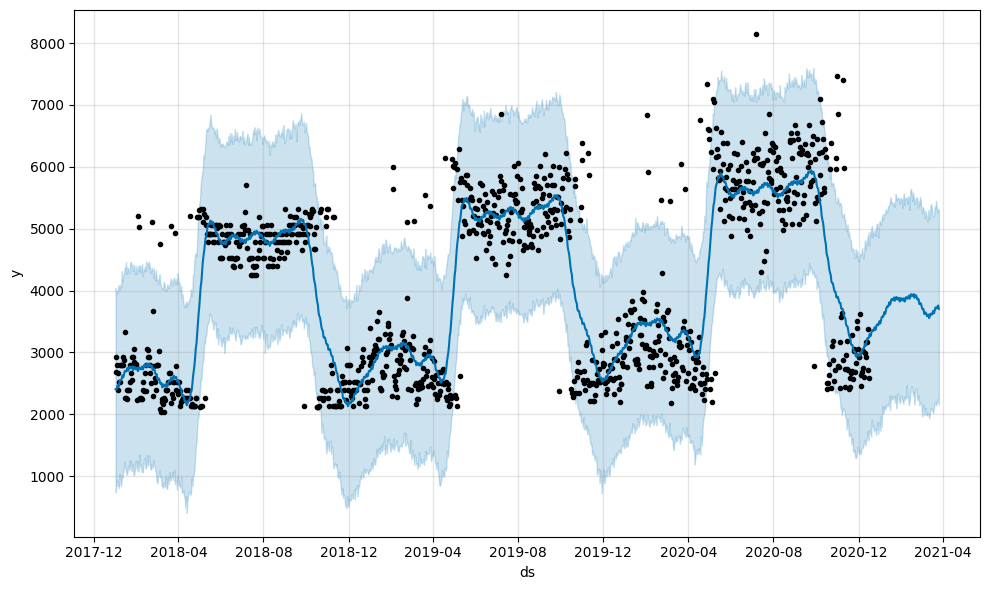

In [13]:
plot1 = m.plot(forecast)

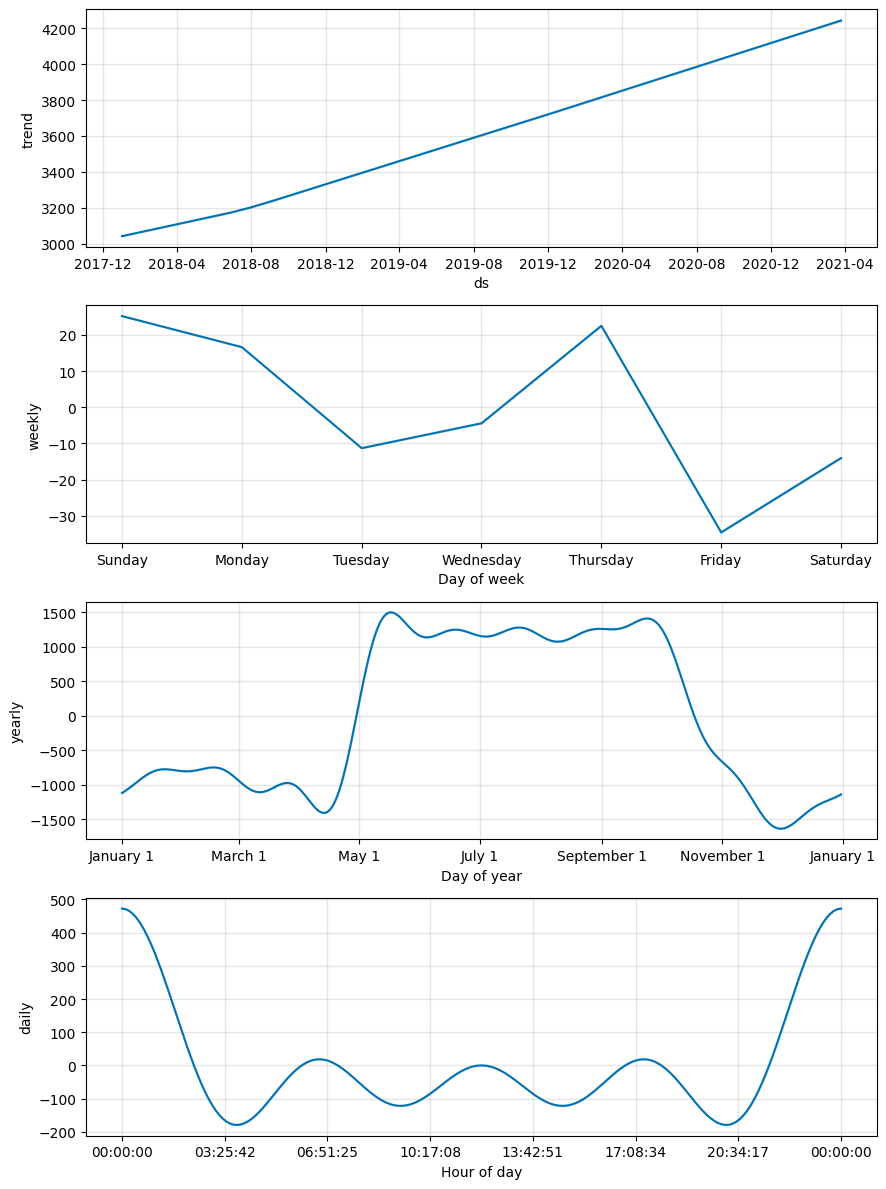

In [14]:
plt2 = m.plot_components(forecast)